# Local Search

All codes here are adapted from [R's & N's AIMA](http://aima.cs.berkeley.edu/).

Most codes here are adapted from R&N AIMA

http://aima.cs.berkeley.edu/

Easy navigation
* [Prelude](#Prelude)
* [8 Queens](#8Queen)
* [A*](#Astar)         
* [Hill Climbing](#HC)
* [Random Restart](#RR)
* [Simulated Annealing](#SA)
* [Local Beam Search](#LBS)
* [Genetic Algorithm](#GA)
* [Epilogue](#Epilogue)

In [1]:
!pwd

/home/jupyter-tatpong@kku.ac.th/Y2024/STO


In [64]:
from SearchAUX2 import Node

## Problem

<a class="anchor" id="Prelude"></a>

It is the world, the environment, or the universe of what we are interested.

### Eight Queen Problem 

<a class="anchor" id="8Queen"></a>

<img src="https://github.com/tatpongkatanyukul/AIX/raw/main/pics/F4p3_8q.png" alt="8 Queens" width="600"/>

Formulate the problem
  * 1 State representation
  * 2 Action representation
  * 3 Transition
  * 4 Cost
  * 5 Goal
  * 6 Heuristic
  * 7 Additional services

### Example: formulating the problem

**State**
Row-positions of the queens, e.g., [0, 5, 1, 4, 6, 3, 7, 2] for Fig (a). Note: rows 0-7 for easy indexing.

**Action**
Move 1 queen to a new row-position: (to-r, c), e.g.,  (4, 1) is moving queen at column 1 to row 4.

**Transition**
s' = s; s'[a[1]]=a[0]
  * recal a = [to-row, col]
  

**Cost**
c(s,a,s') = 0 for all s, a, s'

**Goal**
conflict(s) = 0 # No attacking pair

**Heuristic**
h(s) = max{0, conflict(s) - 2} # non-admissible

**Additional services**
  * ```conflict```
  * ```random_pick```
  
    * A star: none
    * HC: none
    * RR: none
    * SA: none
    * LBS: ```random_pick``` randomly pick $K$ states
    * GA: none

In [47]:
import random

In [48]:
class EightQueenProblem:
    def __init__(self, initial):
        assert type(initial) == type(tuple()) and len(initial) == 8
        self.initial = initial
        self.eval_count = 0

    def _transit(self, s, a):
        r, c = a
        new_state = list(s)
        new_state[c] = r
        return tuple(new_state)
    
    def _visualize(self, s):
        board = []
        
        for r in range(8):
            row = [".",".",".",".",".",".",".","."]
            board.append(row)
            
        for c,r in enumerate(s):
            board[7 - r][c] = "Q"
        
        # Prettize the print
        nicetxt = "  0 1 2 3 4 5 6 7\n"
        nicetxt += "  ---------------\n7|"
        j = 6
        for row in board:
            for column in row:
                nicetxt += column + " "
            nicetxt += '\n{}|'.format(j)
            j -= 1
        
        print(nicetxt[:-3])
        

    def _conflict(self, s):
        '''
        There are 4 conflicts in the N-queen problem:
        column conflict: not possible for this representation, because each queen is represented by each column;
        row conflict: how many duplications in state representation, 
            e.g., row_conflict([1, 2, 3, 4, 5, 0, 6, 7]) = 0, row_conflict([1, 2, 3, 4, 2, 0, 6, 7]) = 1,
            row_conflict([1, 2, 3, 4, 2, 2, 6, 7]) = 3, row_conflict([1, 2, 3, 4, 2, 0, 6, 3]) = 2
        up-diag conflict: x(q) - x(P) == y(q) - y(P), e.g., udiag_conflict([1, 2, 3, 4, 5, 0, 6, 7]) = 11
        down-diag conflict: x(q) - x(P) == y(P) - y(q), e.g., ddiag_conflict([1, 2, 3, 4, 5, 0, 6, 7]) = 0, 
            ddiag_conflict([7, 6, 5, 0, 3, 1, 2, 4]) = 7.
        '''
        rcon_count = 0
        udcon_count = 0
        ddcon_count = 0
        
        for i,q in enumerate(s):
            for j in range(i+1,len(s)):
                
                P = s[j]
                
                # Row conflict        
                if q == P:
                    rcon_count += 1
                    
                # Up-diagonal conflict
                if i - j == q - P:
                    udcon_count += 1
#                     print('* Debug (i= {},q= {}) (j= {}, P={})'.format(i,q,j,P))

                # Down-diagonal conflict
                if i - j == P - q:
                    ddcon_count += 1
#                     print('* Debug (i= {},q= {}) (j= {}, P={})'.format(i,q,j,P))

                
#         print('row conflict =', rcon_count)
#         print('ud conflict =', udcon_count)
#         print('dd conflict =', ddcon_count)
        return rcon_count + udcon_count + ddcon_count

    def successor(self, s):
        """
        Take s: current state/current town
        Return a list of (action, result/linked town) pairs.
        """
        transits = []
        for c in range(8):
            for r in range(8):
                if r == s[c]:
                    continue # skip the current queen row-position
                
                act = (r,c)
                sp = self._transit(s, act)
                transits.append((act, sp))
        
        return transits

    def path_cost(self, cost_to_s, s, action, snext):

        transit_cost = 0
        return cost_to_s + transit_cost

    def goal_test(self, state):
        return self._conflict(state) == 0

    def h(self, state):
        self.eval_count += 1
        # return max(0, self._conflict(state) - 2)  # Non-admissible
        return self._conflict(state)

    def state_val(self, state):
        self.eval_count += 1
        return self._conflict(state)
    
    def node_val(self, node):
        self.eval_count += 1
        return self._conflict(node.state)
        
    def random_pick(self, K):    
        randset = []
        for k in range(K):
            statek = []
            for i in range(8):
                statek.append(random.randrange(8))
            randset.append(Node(statek))
        return tuple(randset)
        


In [49]:
state = (1,2,3,4,5,6,0,7)
prob = EightQueenProblem(state)

prob.successor(state)

[((0, 0), (0, 2, 3, 4, 5, 6, 0, 7)),
 ((2, 0), (2, 2, 3, 4, 5, 6, 0, 7)),
 ((3, 0), (3, 2, 3, 4, 5, 6, 0, 7)),
 ((4, 0), (4, 2, 3, 4, 5, 6, 0, 7)),
 ((5, 0), (5, 2, 3, 4, 5, 6, 0, 7)),
 ((6, 0), (6, 2, 3, 4, 5, 6, 0, 7)),
 ((7, 0), (7, 2, 3, 4, 5, 6, 0, 7)),
 ((0, 1), (1, 0, 3, 4, 5, 6, 0, 7)),
 ((1, 1), (1, 1, 3, 4, 5, 6, 0, 7)),
 ((3, 1), (1, 3, 3, 4, 5, 6, 0, 7)),
 ((4, 1), (1, 4, 3, 4, 5, 6, 0, 7)),
 ((5, 1), (1, 5, 3, 4, 5, 6, 0, 7)),
 ((6, 1), (1, 6, 3, 4, 5, 6, 0, 7)),
 ((7, 1), (1, 7, 3, 4, 5, 6, 0, 7)),
 ((0, 2), (1, 2, 0, 4, 5, 6, 0, 7)),
 ((1, 2), (1, 2, 1, 4, 5, 6, 0, 7)),
 ((2, 2), (1, 2, 2, 4, 5, 6, 0, 7)),
 ((4, 2), (1, 2, 4, 4, 5, 6, 0, 7)),
 ((5, 2), (1, 2, 5, 4, 5, 6, 0, 7)),
 ((6, 2), (1, 2, 6, 4, 5, 6, 0, 7)),
 ((7, 2), (1, 2, 7, 4, 5, 6, 0, 7)),
 ((0, 3), (1, 2, 3, 0, 5, 6, 0, 7)),
 ((1, 3), (1, 2, 3, 1, 5, 6, 0, 7)),
 ((2, 3), (1, 2, 3, 2, 5, 6, 0, 7)),
 ((3, 3), (1, 2, 3, 3, 5, 6, 0, 7)),
 ((5, 3), (1, 2, 3, 5, 5, 6, 0, 7)),
 ((6, 3), (1, 2, 3, 6, 5, 6, 0, 7)),
 

In [50]:
len(prob.successor(state))

56

In [51]:
###########################################        
# Test
###########################################

def test_EightQueen():
    

    state = (1,2,3,4,5,6,0,7)
    prob = EightQueenProblem(state)

    # Test _transit
    prob._transit(state, (0,7))



    # Test successor
    state = (0, 5, 1, 4, 6, 3, 7, 2)
    print(state)
    opts = prob.successor(state)
    print("options =", len(opts))
    for a, o in opts:
        print("a = {}; sp = {}".format(a, o))
        
    # Test path_cost
    prob.path_cost(100, state, (7,5), (1,2,3,4,5,7,0,7))        


    # Test _conflict
    states = (
    (1, 2, 3, 4, 5, 0, 6, 7),
    (7, 6, 5, 0, 3, 1, 2, 4),
    (1, 2, 3, 4, 2, 2, 6, 7),
    (1, 2, 3, 4, 2, 2, 6, 1),
    (0, 5, 1, 4, 6, 3, 7, 2),
    (7, 2, 1, 4, 3, 2, 1, 2),
    (0, 5, 1, 4, 6, 3, 9, 2), # I trick it so that I can test if goal_test is working.

    )

    for state in states:
        print(state)
        prob._visualize(state)
        print("#conflicts =", prob._conflict(state))
        print(prob.goal_test(state))
        print('h(s) =', prob.h(state))
        print('val(s)', prob.state_val(state))

    # Test random_pick
    rand_set = prob.random_pick(5)
    for n in rand_set:
        print(n.state)


In [52]:
test_EightQueen()

(0, 5, 1, 4, 6, 3, 7, 2)
options = 56
a = (1, 0); sp = (1, 5, 1, 4, 6, 3, 7, 2)
a = (2, 0); sp = (2, 5, 1, 4, 6, 3, 7, 2)
a = (3, 0); sp = (3, 5, 1, 4, 6, 3, 7, 2)
a = (4, 0); sp = (4, 5, 1, 4, 6, 3, 7, 2)
a = (5, 0); sp = (5, 5, 1, 4, 6, 3, 7, 2)
a = (6, 0); sp = (6, 5, 1, 4, 6, 3, 7, 2)
a = (7, 0); sp = (7, 5, 1, 4, 6, 3, 7, 2)
a = (0, 1); sp = (0, 0, 1, 4, 6, 3, 7, 2)
a = (1, 1); sp = (0, 1, 1, 4, 6, 3, 7, 2)
a = (2, 1); sp = (0, 2, 1, 4, 6, 3, 7, 2)
a = (3, 1); sp = (0, 3, 1, 4, 6, 3, 7, 2)
a = (4, 1); sp = (0, 4, 1, 4, 6, 3, 7, 2)
a = (6, 1); sp = (0, 6, 1, 4, 6, 3, 7, 2)
a = (7, 1); sp = (0, 7, 1, 4, 6, 3, 7, 2)
a = (0, 2); sp = (0, 5, 0, 4, 6, 3, 7, 2)
a = (2, 2); sp = (0, 5, 2, 4, 6, 3, 7, 2)
a = (3, 2); sp = (0, 5, 3, 4, 6, 3, 7, 2)
a = (4, 2); sp = (0, 5, 4, 4, 6, 3, 7, 2)
a = (5, 2); sp = (0, 5, 5, 4, 6, 3, 7, 2)
a = (6, 2); sp = (0, 5, 6, 4, 6, 3, 7, 2)
a = (7, 2); sp = (0, 5, 7, 4, 6, 3, 7, 2)
a = (0, 3); sp = (0, 5, 1, 0, 6, 3, 7, 2)
a = (1, 3); sp = (0, 5, 1, 1, 6, 3, 7,

# Approaches

Exhaustive search
* $8^8$ trials

In [53]:
8**8

16777216

In [54]:
import SearchAUX2 as m

In [55]:
import importlib
importlib.reload(m)

<module 'SearchAUX2' from '/home/jupyter-tatpong@kku.ac.th/Y2024/STO/SearchAUX2.py'>

In [56]:
# dir(m)

In [57]:
import inspect

lines = inspect.getsource(m.best_first_search)
print(lines)

def best_first_search(problem, f, show=False):
    fringe = PriorityQueue(min, f)                              # Set up a queue by f of node
    fringe.append(Node(problem.initial))                        # Add the initial state
    search_cost = 0
    if show:
        showq(fringe, "queue")

    reached = {}                                                # A record of states reached
    while not fringe.is_empty():                                # Traverse a queue
        node = fringe.pop()                                     # Pop the first in queue
        if problem.goal_test(node.state):                       # Check if goal is reach
            return node, search_cost                            # Yes, return the found
        if (node.state not in reached) or (node.path_cost < reached[node.state].path_cost):    
                                                                # Check if it's a new node or an old one with a better path     
            reached[node.state] = node 

# Bread-first search

In [58]:
state = (0, 1, 2, 3, 4, 5, 6, 7)
prob = EightQueenProblem(state)

print(prob.initial)
print('Eval count =', prob.eval_count)


prob._visualize(state)
print(prob.state_val(state))

(0, 1, 2, 3, 4, 5, 6, 7)
Eval count = 0
  0 1 2 3 4 5 6 7
  ---------------
7|. . . . . . . Q 
6|. . . . . . Q . 
5|. . . . . Q . . 
4|. . . . Q . . . 
3|. . . Q . . . . 
2|. . Q . . . . . 
1|. Q . . . . . . 
0|Q . . . . . . . 

28


Q: What is the time complexity of the Breadth-First Search?

A: $O(b^d)$ 
  * $d$ : the depth of the shallowest solution.
  * $b$ : branching factor ?

In [59]:
len(prob.successor(state))

56

Q: How deep is the shallowest solution?
A: ```EightQueenProblem``` can move one column at a time. So 8 columns.
   * Deepest depth is 8.
   * Shallowest ?
      * Suppose within 8 moves, we can solve it. 

In [60]:
56**8

96717311574016

It may seem worse than the exhaustive search.
But if we implement BFS with memory, it can be limited to exhaustive search bad.

In [61]:
def fee(node):
    return node.depth + 0.001*random.random()

In [62]:
import time

In [63]:
t1 = time.time()
rst, scost = m.best_first_search(prob, fee, show=False)
t2 = time.time()

print('Search time =', t2 - t1)
print('Search cost =', scost)
print('Eval count =', prob.eval_count)
print('Solution =', rst.state)
print('Path cost =', rst.path_cost)


TypeError: '<' not supported between instances of 'Node' and 'Node'

# Uniform-cost search

Since this problem has no path cost, i.e., no transit cost, we only care about the final state.

Therefore, running uniform-cost-search with no path cost is non-sense.

# A*

<a class="anchor" id="Astar"></a>

In [65]:
def fee(node):
    return node.path_cost + prob.h(node.state) + 0.001*random.random()


In [66]:
# Try A* on 8 Queens

state = (1, 1, 1, 1, 1, 1, 1, 1)
prob = EightQueenProblem(state)

print(prob.initial)
print('Eval count =', prob.eval_count)

(1, 1, 1, 1, 1, 1, 1, 1)
Eval count = 0


In [67]:
t1 = time.time()
rst, scost = m.best_first_search(prob, fee, show=False)
t2 = time.time()

print('Search time =', t2 - t1)
print('Search cost =', scost)
print('Eval count =', prob.eval_count)
print('Solution =', rst.state)
print('Path cost =', rst.path_cost)

Search time = 0.04855084419250488
Search cost = 23
Eval count = 1289
Solution = (1, 4, 6, 0, 2, 7, 5, 3)
Path cost = 0


In [68]:
prob._visualize(rst.state)

print(prob.state_val(rst.state))

  0 1 2 3 4 5 6 7
  ---------------
7|. . . . . Q . . 
6|. . Q . . . . . 
5|. . . . . . Q . 
4|. Q . . . . . . 
3|. . . . . . . Q 
2|. . . . Q . . . 
1|Q . . . . . . . 
0|. . . Q . . . . 

0


In [69]:
soln = rst.path()

route = ""
for s in soln:
    route = str(s.state) + ' #val={}\n'.format(prob.state_val(s.state)) + route

print(route)  
print('search cost =', scost)
print('path cost =', rst.path_cost)

(1, 1, 1, 1, 1, 1, 1, 1) #val=28
(1, 1, 1, 1, 1, 7, 1, 1) #val=21
(6, 1, 1, 1, 1, 7, 1, 1) #val=15
(6, 1, 1, 1, 5, 7, 1, 1) #val=10
(6, 4, 1, 1, 5, 7, 1, 1) #val=6
(6, 4, 1, 1, 5, 7, 1, 3) #val=3
(6, 4, 1, 1, 5, 7, 0, 3) #val=2
(7, 4, 1, 1, 5, 7, 0, 3) #val=2
(7, 4, 6, 1, 5, 7, 0, 3) #val=1
(7, 4, 6, 1, 5, 2, 0, 3) #val=1
(0, 4, 6, 1, 5, 2, 0, 3) #val=1
(0, 4, 6, 1, 5, 7, 0, 3) #val=1
(0, 4, 6, 1, 5, 7, 5, 3) #val=1
(0, 4, 6, 1, 5, 7, 1, 3) #val=1
(0, 4, 6, 0, 5, 7, 1, 3) #val=1
(0, 4, 6, 0, 2, 7, 1, 3) #val=1
(1, 4, 6, 0, 2, 7, 1, 3) #val=1
(1, 4, 6, 0, 2, 7, 5, 3) #val=0

search cost = 23
path cost = 0


# Hill Climbing 

<a class="anchor" id="HC"></a>

In [70]:
import time

In [71]:
from SearchAUX2 import Node

In [72]:
def argmin(seq, fn):
    best = seq[0]; best_score = fn(best)
    for x in seq:
        x_score = fn(x)
        if x_score < best_score:
            best, best_score = x, x_score
    return best

In [73]:
def argmax(seq, fn):
    return argmin(seq, lambda x: -fn(x))    
    

In [74]:
def hill_climbing(problem):
    current = Node(problem.initial)
    current_val = problem.node_val(current)
    search_cost = 0
    while True:
        hood = current.expand(problem)        
        search_cost += 1

        if len(hood) < 1:
            break        

        neighbor = argmax(hood, fn=problem.node_val)
        neighbor_val = problem.node_val(neighbor)
        if neighbor_val <= current_val:
            return current, search_cost
        current = neighbor
        current_val = neighbor_val

In [75]:
# Try HC on 8 Queens

state = (0, 5, 1, 4, 6, 3, 7, 2) #(1, 1, 1, 1, 1, 1, 1, 1)
# state = (0, 1, 2, 3, 4, 5, 6, 7)
prob = EightQueenProblem(state)

print(prob.initial)
print('Eval count =', prob.eval_count)

(0, 5, 1, 4, 6, 3, 7, 2)
Eval count = 0


In [76]:
print(prob.state_val(state))

1


In [77]:
print('Eval count =', prob.eval_count)

Eval count = 1


In [78]:
t1 = time.time()
rst, scost = hill_climbing(prob)
t2 = time.time()

print('Search time =', t2 - t1)
print('Search cost =', scost)
print('Eval count =', prob.eval_count)
print('Solution =', rst.state)
print('Path cost =', rst.path_cost)

Search time = 0.007960319519042969
Search cost = 6
Eval count = 350
Solution = (1, 2, 3, 4, 5, 6, 7, 2)
Path cost = 0


In [79]:
prob._visualize(rst.state)

print(prob.state_val(rst.state))

  0 1 2 3 4 5 6 7
  ---------------
7|. . . . . . Q . 
6|. . . . . Q . . 
5|. . . . Q . . . 
4|. . . Q . . . . 
3|. . Q . . . . . 
2|. Q . . . . . Q 
1|Q . . . . . . . 
0|. . . . . . . . 

23


WHAT'S WRONG!!!!

Hill climbing is to **maximize** ```node_val```.
But, ```EightQueenProblem``` implements ```node_val``` as a number of conflicts to minimize.

### Correct ```EightQueen``` to maximization version

In [80]:
class EightQueenMaxProblem(EightQueenProblem):
    def node_val(self, node):
        self.eval_count += 1
        return -1*self._conflict(node.state)

Note that I keep ```state_val``` as it is, so that we can use it to check out the state value as we perceive it.

In [81]:
state = (1, 1, 1, 1, 1, 1, 1, 1) #val=28
# state = (1, 1, 1, 1, 6, 1, 1, 1) #val=21
# (1, 4, 1, 1, 6, 1, 1, 1) #val=15
# (0, 4, 1, 1, 6, 1, 1, 1) #val=10
# (0, 4, 1, 1, 6, 1, 7, 1) #val=6
# (0, 4, 1, 1, 6, 1, 7, 2) #val=3
# (0, 4, 1, 1, 6, 2, 7, 2) #val=2
# (0, 4, 1, 5, 6, 2, 7, 2) #val=2
# (0, 4, 1, 5, 0, 2, 7, 2) #val=2
# (0, 4, 1, 5, 0, 2, 7, 5) #val=2
# (0, 4, 1, 6, 0, 2, 7, 5) #val=2
# (0, 7, 1, 6, 0, 2, 7, 5) #val=2
# (2, 7, 1, 6, 0, 2, 7, 5) #val=2
# (2, 7, 1, 6, 0, 5, 7, 5) #val=2
# (2, 7, 1, 6, 0, 0, 7, 5) #val=2
# (2, 7, 1, 6, 0, 0, 7, 4) #val=2
# (2, 6, 1, 6, 0, 0, 7, 4) #val=2
# (2, 6, 1, 6, 0, 3, 7, 4) #val=1
# (2, 0, 1, 6, 0, 3, 7, 4) #val=2
# (5, 0, 1, 6, 0, 3, 7, 4) #val=2
# (5, 7, 1, 6, 0, 3, 7, 4) #val=2
# (5, 7, 1, 6, 0, 3, 6, 4) #val=2
# (5, 7, 1, 7, 0, 3, 6, 4) #val=2
# (5, 4, 1, 7, 0, 3, 6, 4) #val=2
# (5, 1, 1, 7, 0, 3, 6, 4) #val=2
# (5, 1, 1, 7, 0, 3, 6, 2) #val=2
# (5, 3, 1, 7, 0, 3, 6, 2) #val=2
# (5, 3, 1, 4, 0, 3, 6, 2) #val=2
# (5, 5, 1, 4, 0, 3, 6, 2) #val=1
# (7, 5, 1, 4, 0, 3, 6, 2) #val=1
# (7, 4, 1, 4, 0, 3, 6, 2) #val=2
# (2, 4, 1, 4, 0, 3, 6, 2) #val=2
# (2, 4, 1, 4, 0, 3, 6, 7) #val=2
# (2, 5, 1, 4, 0, 3, 6, 7) #val=1
# (2, 5, 1, 4, 7, 3, 6, 7) #val=2
# (2, 5, 1, 4, 1, 3, 6, 7) #val=2
# (2, 5, 1, 4, 1, 3, 6, 3) #val=2
# (2, 5, 1, 4, 1, 3, 6, 2) #val=2
# (2, 5, 1, 4, 7, 3, 6, 2) #val=1
# (2, 5, 1, 4, 7, 3, 6, 6) #val=2
# (2, 5, 1, 4, 7, 3, 6, 1) #val=2
# (2, 5, 1, 4, 7, 0, 6, 1) #val=1
# (2, 5, 1, 4, 7, 0, 4, 1) #val=2
# (2, 5, 1, 4, 7, 0, 4, 7) #val=2
# (2, 5, 1, 4, 7, 0, 4, 6) #val=2
# (2, 5, 1, 4, 7, 0, 6, 6) #val=2
# state = (2, 5, 1, 4, 7, 0, 6, 5) #val=2
# (2, 5, 1, 4, 7, 0, 6, 3) #val=0


In [82]:
prob = EightQueenMaxProblem(state)

print('Initial state:', prob.initial)
print('Eval count =', prob.eval_count)

t1 = time.time()
rst, scost = hill_climbing(prob)
t2 = time.time()

print('Search time =', t2 - t1)
print('Search cost =', scost)
print('Eval count =', prob.eval_count)
print('Solution =', rst.state)
print('Path cost =', rst.path_cost)
print('State val =', prob.state_val(rst.state))

Initial state: (1, 1, 1, 1, 1, 1, 1, 1)
Eval count = 0
Search time = 0.004447221755981445
Search cost = 7
Eval count = 407
Solution = (3, 0, 7, 2, 6, 1, 1, 4)
Path cost = 0
State val = 2


It still could not get us to the solution (state val = 0, no attacking pair.)

In [83]:
# Check its neighborhood

hood = rst.expand(prob)
for h in hood:
    print("{} # val={}".format(h.state, prob.state_val(h.state)))

(0, 0, 7, 2, 6, 1, 1, 4) # val=3
(1, 0, 7, 2, 6, 1, 1, 4) # val=5
(2, 0, 7, 2, 6, 1, 1, 4) # val=4
(4, 0, 7, 2, 6, 1, 1, 4) # val=3
(5, 0, 7, 2, 6, 1, 1, 4) # val=4
(6, 0, 7, 2, 6, 1, 1, 4) # val=4
(7, 0, 7, 2, 6, 1, 1, 4) # val=4
(3, 1, 7, 2, 6, 1, 1, 4) # val=3
(3, 2, 7, 2, 6, 1, 1, 4) # val=3
(3, 3, 7, 2, 6, 1, 1, 4) # val=3
(3, 4, 7, 2, 6, 1, 1, 4) # val=4
(3, 5, 7, 2, 6, 1, 1, 4) # val=2
(3, 6, 7, 2, 6, 1, 1, 4) # val=4
(3, 7, 7, 2, 6, 1, 1, 4) # val=2
(3, 0, 0, 2, 6, 1, 1, 4) # val=3
(3, 0, 1, 2, 6, 1, 1, 4) # val=7
(3, 0, 2, 2, 6, 1, 1, 4) # val=3
(3, 0, 3, 2, 6, 1, 1, 4) # val=4
(3, 0, 4, 2, 6, 1, 1, 4) # val=5
(3, 0, 5, 2, 6, 1, 1, 4) # val=4
(3, 0, 6, 2, 6, 1, 1, 4) # val=3
(3, 0, 7, 0, 6, 1, 1, 4) # val=4
(3, 0, 7, 1, 6, 1, 1, 4) # val=3
(3, 0, 7, 3, 6, 1, 1, 4) # val=3
(3, 0, 7, 4, 6, 1, 1, 4) # val=3
(3, 0, 7, 5, 6, 1, 1, 4) # val=2
(3, 0, 7, 6, 6, 1, 1, 4) # val=4
(3, 0, 7, 7, 6, 1, 1, 4) # val=3
(3, 0, 7, 2, 0, 1, 1, 4) # val=4
(3, 0, 7, 2, 1, 1, 1, 4) # val=6
(3, 0, 7, 

Notice that we are at the plateau---the best neighbor is just as good, no better.

Plateau can be a shoulder or just a flat local maximum.

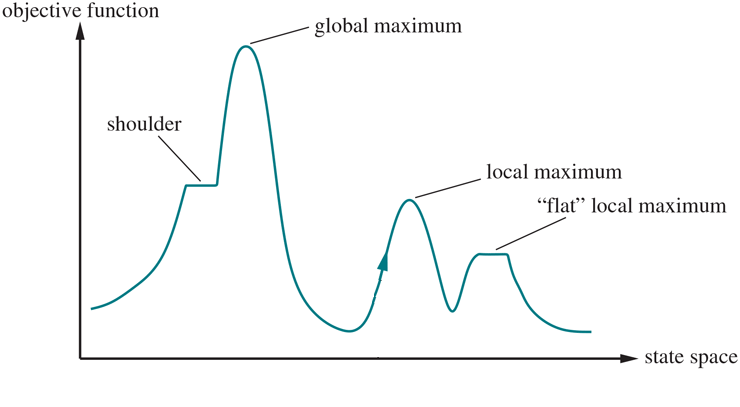

We have found the **local optimum**.

That's why this is called **local search**.

## Experimentation: HC
<a class="anchor" id="experimentHC"></a>



In [84]:
print(time.ctime())
nRepeat = 40 # We should do 40! We will discuss about this when we have chance to get to the significance test. 

results = {'init': [], 'search time': [], 'final state': [], 'final val': [],
          'eval count': []}

for i in range(nRepeat):
    prob = EightQueenMaxProblem(state)
    prob.initial = prob.random_pick(1)[0].state
#     print('Repeat', i)
#     print('* Initial state:', prob.initial)
    results['init'].append(prob.initial)

    t1 = time.time()
    rst, scost = hill_climbing(prob)
    t2 = time.time()
    
    results['search time'].append(t2 - t1)
    results['eval count'].append(prob.eval_count)
    results['final state'].append(rst)    
    results['final val'].append(prob.state_val(rst.state))
    
print('Finished at')
print(time.ctime())

Fri Sep 13 11:19:44 2024
Finished at
Fri Sep 13 11:19:44 2024


In [85]:
from matplotlib import pyplot as plt

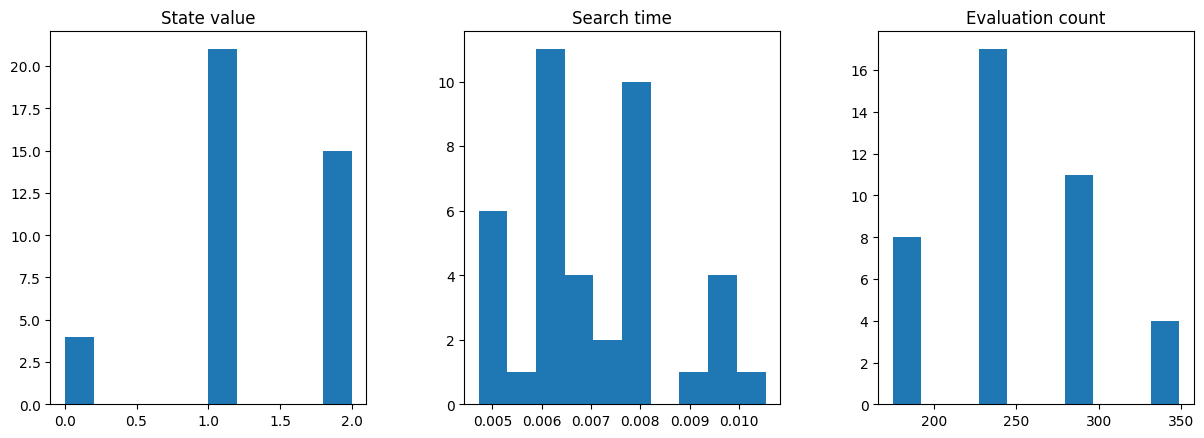

Measurement	Min	Max	Average
final val	0.00	2.00	1.27
search time	0.00	0.01	0.01
eval count	175.00	349.00	248.95


In [86]:
fig, axes = plt.subplots(nrows=1, ncols=3)
fig.tight_layout(rect=[0.1, 0.1, 2, 1], h_pad=4, w_pad=4)

plt.subplot(1,3,1)
plt.hist(results['final val']);
plt.title('State value')

plt.subplot(1,3,2)
plt.hist(results['search time']);
plt.title('Search time')

plt.subplot(1,3,3)
plt.hist(results['eval count']);
plt.title('Evaluation count')

plt.show()

print('Measurement\tMin\tMax\tAverage')
for k in ('final val', 'search time', 'eval count'):
    print('{}\t{:.2f}\t{:.2f}\t{:.2f}'.format(k, min(results[k]), max(results[k]), 
                                sum(results[k])/len(results[k])))

## HC with Sideway Move

Allowing sideway move addresses the shoulder situation.

In [87]:
def hill_climbing_sideway(problem):
    current = Node(problem.initial)
    current_val = problem.node_val(current)
    search_cost = 0
    while True:
        hood = current.expand(problem)        
        search_cost += 1

        if len(hood) < 1:
            break
        
        neighbor = argmax(hood, fn=problem.node_val)
        neighbor_val = problem.node_val(neighbor)

        # Only remove equality condition
        if neighbor_val < current_val:  # Note the risk of getting stuck in a loop.
            return current, search_cost
        current = neighbor           
        current_val = neighbor_val

In [88]:
prob = EightQueenMaxProblem(state)
print('Initial state:', prob.initial)
# print('Eval count =', prob.eval_count)

t1 = time.time()
rst, scost = hill_climbing_sideway(prob)
t2 = time.time()

print('Search time =', t2 - t1)
print('Search cost =', scost)
print('Eval count =', prob.eval_count)
print('Solution =', rst.state)
print('Path cost =', rst.path_cost)
print('State val =', prob.state_val(rst.state))

Initial state: (1, 1, 1, 1, 1, 1, 1, 1)
Search time = 0.004686594009399414
Search cost = 10
Eval count = 581
Solution = (0, 5, 7, 2, 6, 3, 1, 4)
Path cost = 0
State val = 0


It turns out to be good enough in this case.
But to be sure we have to repeat it multiple times.

**Caution!** HC with sideway move may get stucked in a loop!
Before running the experiment, safegaurd against a loop (simple mechanism, inc. limiting a number of iterations; fancy mechanism may check for visited state).

# Random Restart 

<a class="anchor" id="RR"></a>

In [89]:
infinity = 10e14

def hill_climbing_random_restart(problem, MAXITER, nRestart):
    best = None
    best_val = -infinity
    search_cost = 0
    
    for n in range(nRestart):
        current = problem.random_pick(1)[0]
        current_val = problem.node_val(current)
    
        # Each HC run
        for i in range(MAXITER):
            hood = current.expand(problem)        
            search_cost += 1

            if len(hood) < 1:
                break
                
            neighbor = argmax(hood, fn=problem.node_val)
            neighbor_val = problem.node_val(neighbor)
            if neighbor_val <= current_val:
                break
            current = neighbor
            current_val = neighbor_val
        if current_val > best_val:
            best = current
            best_val = current_val
        if problem.goal_test(best.state):
            return best, search_cost
            
    return best, search_cost

In [90]:
prob = EightQueenMaxProblem(state)
print('Initial state:', prob.initial)
print('Eval count =', prob.eval_count)

t1 = time.time()
rst, scost = hill_climbing_random_restart(prob, 20, 100)
t2 = time.time()

print('Search time =', t2 - t1)
print('Search cost =', scost)
print('Eval count =', prob.eval_count)
print('Solution =', rst.state)
print('Path cost =', rst.path_cost)
print('State val =', prob.state_val(rst.state))

Initial state: (1, 1, 1, 1, 1, 1, 1, 1)
Eval count = 0
Search time = 0.029690980911254883
Search cost = 18
Eval count = 1048
Solution = (6, 3, 1, 4, 7, 0, 2, 5)
Path cost = 0
State val = 0


# Simulated Annealing 

<a class="anchor" id="SA"></a>

Inspired by annealing process (See [Annealing](https://en.wikipedia.org/wiki/Annealing_(materials_science)) and [How to make a samurai sword/Forging a katana](https://www.youtube.com/watch?v=VE_4zHNcieM) to learn more.)

1. Randomly choose a neighbor

2. If a neighbor is better than the current, move to the neighbor.

2. If a neighbor is not better, move to the neighbor with probability $p$.
    
   * $p$ depends on how good the neighbor's value is.
    
     * If the neighbor's value is not far below the current's, $p$ is high.
     * If the neighbor's value is very bad, $p$ is very low.

   * This $p$ decreases with time though temperature scheduling.
   


Probability $p = e^{\frac{\Delta E}{T}}$, 
where $\Delta E = f(n') - f(n)$ for $n'$ is the neighbor and $n$ is the current.

* $\Delta E > 0$ $\Rightarrow$ neighbor's value is better.

* $\Delta E \leq 0$ $\Rightarrow$ neighbor's value is not better.

In [2]:
import numpy as np
from matplotlib import pyplot as plt

Text(0, 0.5, 'Probability, p')

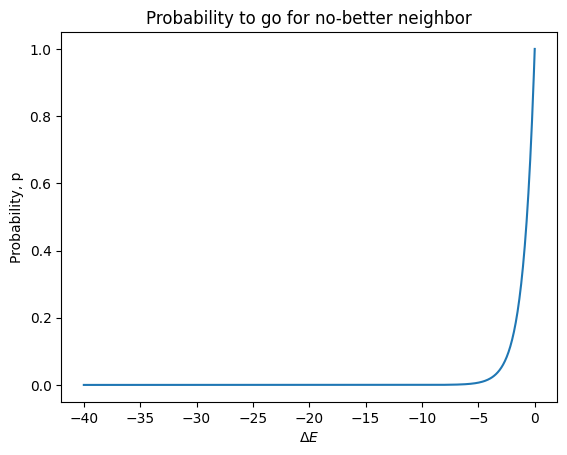

In [7]:
T = 1
dE = np.linspace(-40, 0, 500)
plt.plot(dE, np.exp(dE/T))
plt.title('Probability to go for no-better neighbor')
plt.xlabel('$\Delta E$')
plt.ylabel('Probability, p')

Text(0, 0.5, 'Probability, p')

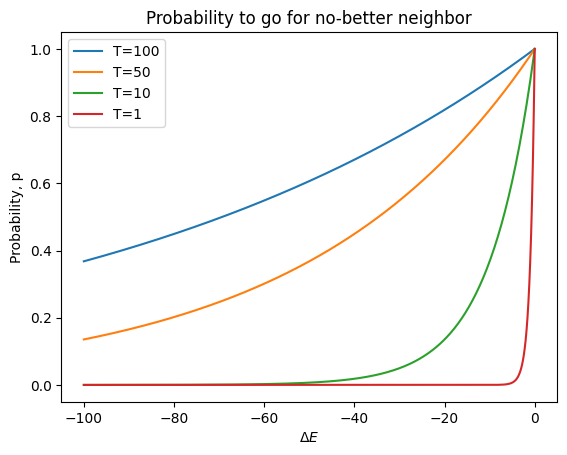

In [10]:
dE = np.linspace(-100, 0, 500)

for T in [100, 50, 10, 1]:
    plt.plot(dE, np.exp(dE/T), label=f'{T=}')

plt.legend()
plt.title('Probability to go for no-better neighbor')
plt.xlabel('$\Delta E$')
plt.ylabel('Probability, p')

In [91]:
import math

In [92]:
def probability(p):
    "Return true with probability p."
    return p > random.uniform(0.0, 1.0)

In [93]:
epsilon = 1e-20

def simulated_annealing(problem, schedule, nSteps=100):
    current = Node(problem.initial)
    current_val = problem.node_val(current)
    search_cost = 0
    for t in range(nSteps):
        T = schedule(t)
        if T < epsilon:    # numerical stable version for T == 0
            return current, search_cost
#         print('* debug t=', t, '; T=', T, end=';')
        
        next_step = random.choice(current.expand(problem))
        next_val = problem.node_val(next_step) 
        search_cost += 1
        
        if problem.goal_test(next_step.state):
            return next_step, search_cost
        
        delta_E = next_val - current_val
#         print('delta E=', delta_E, end=';')
        if delta_E > 0 or probability(math.exp(delta_E/T)):
            current = next_step
            current_val = next_val
#         print('end iteration.')
    return current, search_cost # return the best found so far

In [94]:
def exp_schedule(i, k=20, lam=0.04, limit=100):
    "One possible schedule function for simulated annealing"
    Temp = 0
    if i < limit:
        Temp = k * math.exp(-lam * i)
        
    return Temp

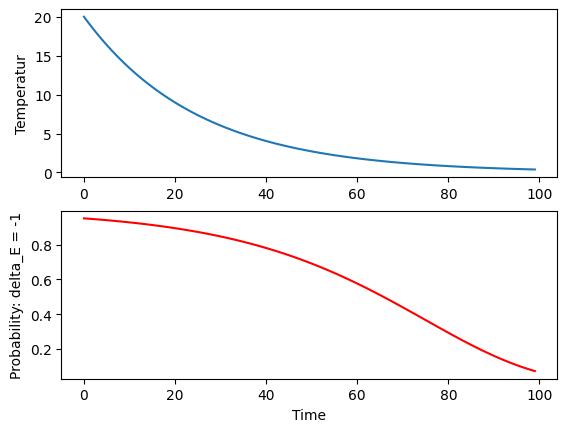

In [95]:
xs = range(100)
ys = [exp_schedule(x) for x in xs]
ps = [math.exp(-1/y) for y in ys]

plt.subplot(2,1,1)
plt.plot(xs, ys)
plt.ylabel('Temperatur')
plt.subplot(2,1,2)
plt.plot(xs, ps, 'r')
plt.ylabel('Probability: delta_E = -1')
plt.xlabel('Time')

plt.show()



In [96]:
prob = EightQueenMaxProblem(state)
print('Initial state:', prob.initial)
print('Eval count =', prob.eval_count)

t1 = time.time()
rst, scost = simulated_annealing(prob, exp_schedule, 4000)
t2 = time.time()

print('Search time =', t2 - t1)
print('Search cost =', scost)
print('Eval count =', prob.eval_count)
print('Solution =', rst.state)
print('Path cost =', rst.path_cost)
print('State val =', prob.state_val(rst.state))

Initial state: (1, 1, 1, 1, 1, 1, 1, 1)
Eval count = 0
Search time = 0.029633283615112305
Search cost = 100
Eval count = 101
Solution = (7, 3, 0, 6, 1, 5, 2, 6)
Path cost = 0
State val = 1


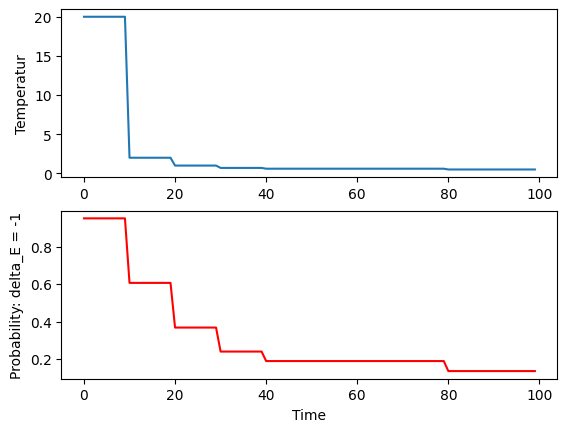

Last probability = 0.1353352832366127


In [97]:
def step_schedule(i):
    Temp = 0.5
    if i < 10:
        Temp = 20
    elif i < 20:
        Temp = 2
    elif i < 30:
        Temp = 1
    elif i < 40:
        Temp = 0.7
    elif i < 80:
        Temp = 0.6
    
    return Temp

xs = range(100)
ys = [step_schedule(x) for x in xs]
ps = [math.exp(-1/y) for y in ys]

plt.subplot(2,1,1)
plt.plot(xs, ys)
plt.ylabel('Temperatur')
plt.subplot(2,1,2)
plt.plot(xs, ps, 'r')
plt.ylabel('Probability: delta_E = -1')
plt.xlabel('Time')

plt.show()

print('Last probability =', ps[-1])

I like to keep this some little probability at the tail.

In [98]:
prob = EightQueenMaxProblem(state)
print('Initial state:', prob.initial)
print('Eval count =', prob.eval_count)

t1 = time.time()
rst, scost = simulated_annealing(prob, step_schedule, 4000)
t2 = time.time()

print('Search time =', t2 - t1)
print('Search cost =', scost)
print('Eval count =', prob.eval_count)
print('Solution =', rst.state)
print('Path cost =', rst.path_cost)
print('State val =', prob.state_val(rst.state))

Initial state: (1, 1, 1, 1, 1, 1, 1, 1)
Eval count = 0
Search time = 0.04682493209838867
Search cost = 544
Eval count = 545
Solution = (1, 6, 2, 5, 7, 4, 0, 3)
Path cost = 0
State val = 0


Discussion

     * What is the situation that could be suitable for using SA?
     * What is the advantage of SA over HC?

# Local Beam Search 

<a class="anchor" id="LBS"></a>

* ~"Simultaneous" random-restart hill climbing 

  * Random start for $K$ candidates

  * Expand succesors of all $K$ candidates

  * Select $K$ best candidates

  * Keep do this until reaching goal or run out of candidates.

In [12]:
import inspect

In [13]:
from SearchAUX2 import PriorityQueue
print(inspect.getsource(PriorityQueue))

class PriorityQueue:
    def __init__(self, order=min, f=lambda x: x):
        self.A = [] # Queue
        self.order = order
        self.f = f

    def append(self, item):
        """
        It appends the item into a proper position in the sorted queue.
        """
        bisect.insort(self.A, (self.f(item), item))

    def __len__(self):
        return len(self.A)

    def pop(self):
        if self.order == min:
            return self.A.pop(0)[1]
        else:
            return self.A.pop()[1]
            
    def extend(self, items):
        for item in items: self.append(item)
            
    def is_empty(self):
        return self.__len__() == 0



In [100]:
# Test mechanics before putting in our code

x = [2*a - 1 for a in range(10)]
print(x)
K = 4
print(x[:K])
print(x[-K:])

[-1, 1, 3, 5, 7, 9, 11, 13, 15, 17]
[-1, 1, 3, 5]
[11, 13, 15, 17]


In [101]:
class BeamPool(PriorityQueue):
    def pick_top(self, K=1):
        if self.order == min:
            self.A = self.A[:K]
        else:
            self.A = self.A[-K:]

In [102]:
beam = BeamPool(max, prob.node_val)
beam.append(Node((1,3,4,6,5,0,7,2)))
beam.append(Node((1,1,1,1,1,1,1,1)))
beam.append(Node((1,3,1,1,1,1,1,2)))

for n in beam.A:
    print(n[1].state, ': val=', n[0])
    

print('Pick Top 2')
beam.pick_top(2)

for n in beam.A:
    print(n[1].state, ': val=', n[0])


(1, 1, 1, 1, 1, 1, 1, 1) : val= -28
(1, 3, 1, 1, 1, 1, 1, 2) : val= -17
(1, 3, 4, 6, 5, 0, 7, 2) : val= -8
Pick Top 2
(1, 3, 1, 1, 1, 1, 1, 2) : val= -17
(1, 3, 4, 6, 5, 0, 7, 2) : val= -8


In [103]:
from random import seed
import random

def fee(problem, node):
    return problem.node_val(node) + 0.001*random.random()



def local_beam_search(problem, K, nSteps):
    pool = BeamPool(max, lambda n: fee(problem, n))
    pool.extend(problem.random_pick(K))
    search_cost = 0
    for v, n in pool.A: 
        if problem.goal_test(n.state): return n, search_cost
    for t in range(nSteps):
        all_children = []
        for v, n in pool.A:
            node_children = n.expand(problem)
            search_cost += 1
            for child in node_children:
                if problem.goal_test(child.state):
                    return child, search_cost
                all_children.append(child)
        pool.extend(all_children)
        pool.pick_top(K)
    return pool.pop(), search_cost  # Return the best found


In [104]:
prob = EightQueenMaxProblem(state)
print('Initial state:', prob.initial)
print('Eval count =', prob.eval_count)

t1 = time.time()
rst, scost = local_beam_search(prob, K=1, nSteps=100)
t2 = time.time()

print('Search time =', t2 - t1)
print('Search cost =', scost)
print('Eval count =', prob.eval_count)
print('Solution =', rst.state)
print('Path cost =', rst.path_cost)
print('State val =', prob.state_val(rst.state))

Initial state: (1, 1, 1, 1, 1, 1, 1, 1)
Eval count = 0
Search time = 0.008550405502319336
Search cost = 7
Eval count = 337
Solution = (1, 5, 0, 6, 3, 7, 2, 4)
Path cost = 0
State val = 0


In [77]:
prob = EightQueenMaxProblem(state)
print('Initial state:', prob.initial)
print('Eval count =', prob.eval_count)

t1 = time.time()
rst, scost = local_beam_search(prob, K=2, nSteps=100)
t2 = time.time()

print('Search time =', t2 - t1)
print('Search cost =', scost)
print('Eval count =', prob.eval_count)
print('Solution =', rst.state)
print('Path cost =', rst.path_cost)
print('State val =', prob.state_val(rst.state))

Initial state: (1, 1, 1, 1, 1, 1, 1, 1)
Eval count = 0
Search time = 0.04417824745178223
Search cost = 13
Eval count = 674
Solution = (5, 3, 6, 0, 7, 1, 4, 2)
Path cost = 0
State val = 0


In [78]:
prob = EightQueenMaxProblem(state)
print('Initial state:', prob.initial)
print('Eval count =', prob.eval_count)

t1 = time.time()
rst, scost = local_beam_search(prob, K=5, nSteps=100)
t2 = time.time()

print('Search time =', t2 - t1)
print('Search cost =', scost)
print('Eval count =', prob.eval_count)
print('Solution =', rst.state)
print('Path cost =', rst.path_cost)
print('State val =', prob.state_val(rst.state))

Initial state: (1, 1, 1, 1, 1, 1, 1, 1)
Eval count = 0
Search time = 0.08886885643005371
Search cost = 68
Eval count = 3645
Solution = (6, 3, 1, 4, 7, 0, 2, 5)
Path cost = 0
State val = 0


In [79]:
prob = EightQueenMaxProblem(state)
print('Initial state:', prob.initial)
print('Eval count =', prob.eval_count)

t1 = time.time()
rst, scost = local_beam_search(prob, K=10, nSteps=100)
t2 = time.time()

print('Search time =', t2 - t1)
print('Search cost =', scost)
print('Eval count =', prob.eval_count)
print('Solution =', rst.state)
print('Path cost =', rst.path_cost)
print('State val =', prob.state_val(rst.state))

Initial state: (1, 1, 1, 1, 1, 1, 1, 1)
Eval count = 0
Search time = 0.10469484329223633
Search cost = 32
Eval count = 1690
Solution = (3, 5, 7, 1, 6, 0, 2, 4)
Path cost = 0
State val = 0


# Genetic Algorithm 

<a class="anchor" id="GA"></a>

Inspired by evolution theory.

Key mechanisms
* Selection
* Recombination: cross-over
* Mutation

~Local beam search with more degree of randomness.

1. Start with a generation: population of $K$ candidates

2. Select the candidates to be parents: 
   the fitter is more likely to be selected.

3. Reproduce offsprings from the selected parents.
   * using cross-over.

4. Add in mutation.

5. The offsprings become a new generation and repeat the process.

In [16]:
import random

In [17]:
def parent_selection(pop, pop_cumscores, nParents):
    parents = []
    for i in range(nParents):
        r = random.uniform(0, pop_cumscores[-1])
        for j, s in enumerate(pop_cumscores):
            if s >= r:
                parents.append(pop[j])
                break
        # end for j
    # end for i
    return parents
    
    

[3, 3]


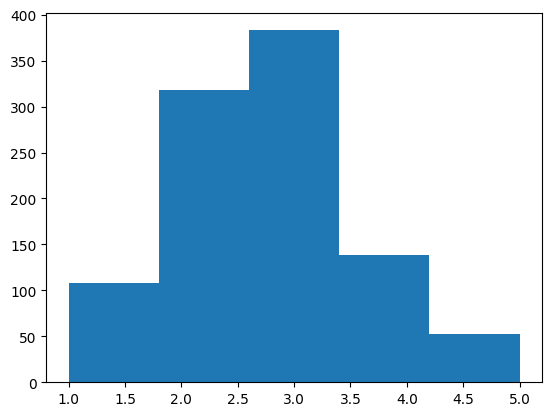

In [18]:
psets = []
for i in range(500):
    parents = parent_selection([1, 2, 3, 4, 5], [10, 40, 80, 95, 100], 2)
    psets.extend(parents)


plt.hist(psets, bins=5);
# print(psets)
print(parents)

(array([71., 63., 51., 50., 58., 68., 67., 72.]),
 array([0.   , 0.875, 1.75 , 2.625, 3.5  , 4.375, 5.25 , 6.125, 7.   ]),
 <BarContainer object of 8 artists>)

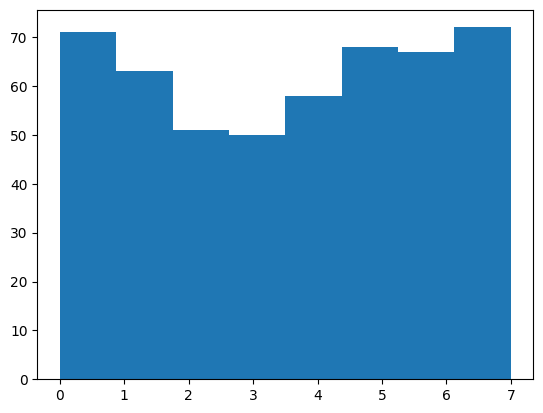

In [107]:
cs = []
for i in range(500):
    cs.append(random.choice((0,1,2,3,4,5,6,7)))
    
plt.hist(cs, bins=8)

In [108]:
def recombination(parents, mut_rate, nucleotides=(0,1,2,3,4,5,6,7)):

    # Crossover
    nParents = len(parents)    
    nChromosome = len(parents[0])
    child = list(parents[0])
    for i in range(1, nParents):
        cp = random.randrange(nChromosome)
        child = child[:cp] + list(parents[i][cp:])
    
    # Mutation
    if probability(mut_rate):
        child = child
        mut_pos = random.randrange(nChromosome)
        mut = random.choice(nucleotides)
        child[mut_pos] = mut
        child = child
    
    return tuple(child)

In [109]:
for i in range(10):
    child = recombination([(-1, -2, -3, -4),(10, 20, 30, 40), (100, 200, 300, 400)], 0.5)
    print(child)


(-1, 200, 300, 400)
(100, 200, 300, 400)
(-1, 200, 300, 400)
(10, 20, 2, 400)
(-1, -2, 300, 400)
(-1, 200, 300, 400)
(6, 200, 300, 400)
(-1, -2, -3, 400)
(100, 1, 300, 400)
(-1, -2, 300, 400)


In [110]:
def genetic_algorithm(population, fitness, ngen=1000, 
                      pmut=0.3, nParents = 2, disp=False, fit_goal=28):
    
    for i in range(ngen):
        # Prepare population cumulative scores for selection by probabilities
        cumulative_scores = []
        cumscore = 0
        fits = []  # for disp/debugging
        for chromosome in population:
            fit = fitness(chromosome)
            cumscore += fit
            cumulative_scores.append(cumscore)
            fits.append(fit)
            
            # Goal test
            if fit >= fit_goal:
                return chromosome
            
        if disp:
            print('* population=', population)            
            print('* fitness=', fits)
            print('* cumulative_scores=', cumulative_scores)
            
            
            
        # Progress to a new population
        next_population = []        
        for i in range(len(population)):
            # Selection
            parents = parent_selection(population, cumulative_scores, nParents)
        
            # Recombination
            child = recombination(parents, pmut)
            
            if disp:
                print('* parents=', parents)            
                print('* child=', child)

            
            # Make up the next generation
            next_population.append(child)
        
        population = next_population
    return argmax(population, fn=fitness)  # Return the best found

Notice that GA manages "chromosome", so that it does not need a ```Node```.

In [111]:
prob = EightQueenMaxProblem(state)
print('Eval count =', prob.eval_count)

pop_size = 3

first_pop = [n.state for n in prob.random_pick(pop_size)] # GA takes in chromosome, which our code takes it as state/tuple.
print("Starting population:")
for chromosome in first_pop:
    print(" ", chromosome)

t1 = time.time()
rst_state = genetic_algorithm(first_pop, prob.state_val, ngen=4, pmut=0.5, nParents=2, disp=True)
t2 = time.time()

print('Search time =', t2 - t1)
print('Final state/chromosome =', rst_state)
print('State val =', prob.state_val(rst_state))
print('Eval count =', prob.eval_count)

Eval count = 0
Starting population:
  [6, 7, 4, 0, 5, 1, 3, 4]
  [3, 1, 3, 1, 2, 3, 3, 5]
  [7, 2, 2, 6, 0, 5, 5, 3]
* population= [[6, 7, 4, 0, 5, 1, 3, 4], [3, 1, 3, 1, 2, 3, 3, 5], [7, 2, 2, 6, 0, 5, 5, 3]]
* fitness= [9, 13, 6]
* cumulative_scores= [9, 22, 28]
* parents= [[6, 7, 4, 0, 5, 1, 3, 4], [6, 7, 4, 0, 5, 1, 3, 4]]
* child= (6, 7, 4, 0, 4, 1, 3, 4)
* parents= [[3, 1, 3, 1, 2, 3, 3, 5], [7, 2, 2, 6, 0, 5, 5, 3]]
* child= (3, 1, 3, 6, 0, 5, 7, 3)
* parents= [[3, 1, 3, 1, 2, 3, 3, 5], [3, 1, 3, 1, 2, 3, 3, 5]]
* child= (3, 1, 3, 1, 4, 3, 3, 5)
* population= [(6, 7, 4, 0, 4, 1, 3, 4), (3, 1, 3, 6, 0, 5, 7, 3), (3, 1, 3, 1, 4, 3, 3, 5)]
* fitness= [11, 8, 12]
* cumulative_scores= [11, 19, 31]
* parents= [(3, 1, 3, 1, 4, 3, 3, 5), (3, 1, 3, 6, 0, 5, 7, 3)]
* child= (3, 1, 3, 1, 0, 3, 7, 3)
* parents= [(3, 1, 3, 6, 0, 5, 7, 3), (3, 1, 3, 1, 4, 3, 3, 5)]
* child= (3, 1, 3, 1, 4, 3, 3, 5)
* parents= [(6, 7, 4, 0, 4, 1, 3, 4), (3, 1, 3, 1, 4, 3, 3, 5)]
* child= (6, 7, 4, 0, 3, 1, 3, 

WHAT's WRONG?

In [112]:
# It is maximization problem!

LARGE = 28

prob = EightQueenMaxProblem(state)
print('Eval count =', prob.eval_count)

pop_size = 10

first_pop = [n.state for n in prob.random_pick(pop_size)] # GA takes in chromosome, which our code takes it as state/tuple.
print("Starting population:")
for chromosome in first_pop:
    print(" ", chromosome)

t1 = time.time()
rst_state = genetic_algorithm(first_pop, lambda s: LARGE-1*prob.state_val(s), ngen=5000, pmut=0.3, nParents=1, disp=False, fit_goal=LARGE)
t2 = time.time()

print('Search time =', t2 - t1)
print('Final state/chromosome =', rst_state)
print('State val =', prob.state_val(rst_state))
print('Eval count =', prob.eval_count)    

Eval count = 0
Starting population:
  [2, 6, 6, 3, 5, 6, 1, 5]
  [5, 2, 2, 4, 7, 5, 7, 5]
  [7, 6, 7, 6, 4, 2, 0, 0]
  [4, 1, 3, 0, 6, 2, 1, 7]
  [0, 7, 1, 3, 1, 4, 7, 2]
  [1, 2, 5, 3, 5, 7, 0, 3]
  [7, 0, 6, 6, 4, 7, 2, 7]
  [2, 3, 4, 3, 4, 2, 4, 2]
  [2, 4, 3, 5, 5, 7, 6, 4]
  [3, 1, 6, 0, 6, 0, 2, 4]
Search time = 0.5805437564849854
Final state/chromosome = (1, 6, 0, 3, 7, 0, 2, 5)
State val = 2
Eval count = 50012


In [113]:
# It is maximization problem!

LARGE = 28 ## I cannot just turn value into negative, because the selection by probability expects non-negative score. Otherwise, rewrite the selection by probability.

prob = EightQueenMaxProblem(state)
print('Eval count =', prob.eval_count)

pop_size = 30

first_pop = [n.state for n in prob.random_pick(pop_size)] # GA takes in chromosome, which our code takes it as state/tuple.
print("Starting population:")
for chromosome in first_pop:
    print(" ", chromosome)

t1 = time.time()
rst_state = genetic_algorithm(first_pop, lambda s: LARGE-1*prob.state_val(s), ngen=1000, pmut=0.8, nParents=2, disp=False, fit_goal=LARGE)
t2 = time.time()

print('Search time =', t2 - t1)
print('Final state/chromosome =', rst_state)
print('State val =', prob.state_val(rst_state))
print('Eval count =', prob.eval_count)    

Eval count = 0
Starting population:
  [0, 2, 2, 6, 3, 3, 3, 3]
  [2, 6, 1, 5, 1, 3, 1, 6]
  [7, 7, 4, 6, 2, 7, 4, 7]
  [4, 3, 4, 5, 1, 2, 7, 3]
  [2, 1, 1, 7, 7, 0, 3, 6]
  [1, 5, 2, 1, 3, 0, 0, 2]
  [0, 5, 3, 0, 2, 6, 6, 3]
  [5, 1, 6, 2, 3, 0, 5, 5]
  [4, 2, 4, 1, 7, 1, 3, 2]
  [4, 1, 6, 7, 7, 3, 5, 0]
  [5, 4, 7, 4, 3, 5, 7, 4]
  [7, 2, 5, 6, 3, 3, 3, 5]
  [6, 7, 4, 1, 0, 3, 5, 0]
  [2, 4, 1, 3, 5, 2, 3, 1]
  [5, 4, 5, 6, 6, 0, 7, 1]
  [1, 0, 4, 4, 1, 5, 6, 0]
  [7, 1, 5, 6, 4, 4, 1, 3]
  [2, 7, 7, 4, 3, 6, 1, 1]
  [7, 6, 1, 4, 1, 2, 1, 1]
  [0, 7, 3, 4, 3, 0, 4, 2]
  [5, 0, 1, 2, 3, 3, 5, 5]
  [3, 7, 4, 2, 5, 4, 2, 3]
  [7, 3, 1, 4, 6, 0, 7, 3]
  [1, 7, 2, 2, 0, 1, 1, 5]
  [3, 1, 1, 7, 1, 3, 0, 2]
  [5, 6, 6, 4, 6, 5, 5, 5]
  [7, 3, 2, 0, 5, 5, 6, 5]
  [4, 4, 6, 6, 5, 1, 3, 7]
  [1, 7, 5, 4, 0, 7, 3, 1]
  [2, 4, 7, 1, 7, 6, 4, 5]
Search time = 1.214919090270996
Final state/chromosome = (6, 0, 7, 4, 0, 2, 7, 5)
State val = 4
Eval count = 30032


In [114]:
prob._visualize(rst_state)

  0 1 2 3 4 5 6 7
  ---------------
7|. . Q . . . Q . 
6|Q . . . . . . . 
5|. . . . . . . Q 
4|. . . Q . . . . 
3|. . . . . . . . 
2|. . . . . Q . . 
1|. . . . . . . . 
0|. Q . . Q . . . 



## Elitism

<a class="anchor" id="elitism">

Keep the best in the population.

In [115]:
import bisect

In [116]:
class GAPool(BeamPool):
    def extend(self, pool):
        if type(pool) == type(GAPool()):
            for item in pool.A:
                bisect.insort(self.A, (item[0], item[1]))
        else:
            for item in pool:
                self.append(item)

In [117]:
xpool = GAPool(max, lambda s: -1*prob.state_val(s))

xpool.extend([(1, 2, 3, 4, 5, 6, 7, 7), (0, 1, 2, 3, 4, 5, 6, 7)])

In [118]:
xpool.A

[(-28, (0, 1, 2, 3, 4, 5, 6, 7)), (-22, (1, 2, 3, 4, 5, 6, 7, 7))]

In [119]:
ypool = GAPool(max, lambda s: -1*prob.state_val(s))
print(ypool.A)
ypool.extend(xpool)
print(ypool.A)

[]
[(-28, (0, 1, 2, 3, 4, 5, 6, 7)), (-22, (1, 2, 3, 4, 5, 6, 7, 7))]


In [120]:
def parent_selection_elite(pop, pop_cumscores, nParents):
    parents = []
    for i in range(nParents):
        r = random.uniform(0, pop_cumscores[-1])
        for j, s in enumerate(pop_cumscores):
            if s >= r:
                parents.append(pop.A[j][1])
                break
        # end for j
    # end for i
    return parents

In [121]:
precursors = parent_selection_elite(ypool, [1, 10], 1)
print(precursors)

[(1, 2, 3, 4, 5, 6, 7, 7)]


In [122]:
def ga_elite(population, fitness, ngen=1000, 
            pmut=0.3, nParents = 2, disp=False, fit_goal=28):
    
    pop = GAPool(max, fitness)
    pop.extend(population)
    
    for i in range(ngen):
        # Prepare population cumulative scores for selection by probabilities
        cumulative_scores = []
        cumscore = 0
        fits = []  # for disp/debugging
        for fit, chromosome in pop.A:
            cumscore += fit
            cumulative_scores.append(cumscore)
            fits.append(fit)
            
            # Goal test
            if fit >= fit_goal:
                return chromosome
            
        if disp:
            print('* population=', pop.A)            
            print('* fitness=', fits)
            print('* cumulative_scores=', cumulative_scores)
                        
        # Progress to a new population
        next_population = GAPool(max, fitness)
        next_population.extend(pop)
        
        for i in range(len(pop.A)):
            # Selection
            parents = parent_selection_elite(pop, cumulative_scores, nParents)
        
            # Recombination
            child = recombination(parents, pmut)
            
            if disp:
                print('* parents=', parents)            
                print('* child=', child)

            
            # Make up the next generation
            next_population.append(child)
        
        next_population.pick_top(len(pop.A))
        pop = next_population
    return pop.pop()  # Return the best found

In [123]:
# It is maximization problem!
LARGE = 28

prob = EightQueenMaxProblem(state)
print('Eval count =', prob.eval_count)

pop_size = 30

first_pop = [tuple(n.state) for n in prob.random_pick(pop_size)] # GA takes in chromosome, which our code takes it as state/tuple.
print("Starting population:")
for chromosome in first_pop:
    print(" ", chromosome)

t1 = time.time()
rst_state = ga_elite(first_pop, lambda s: LARGE-1*prob.state_val(s), ngen=1000, pmut=0.8, nParents=2, disp=False, fit_goal=LARGE)
t2 = time.time()

print('Search time =', t2 - t1)
print('Final state/chromosome =', rst_state)
print('State val =', prob.state_val(rst_state))
print('Eval count =', prob.eval_count) 

prob._visualize(rst_state)

Eval count = 0
Starting population:
  (3, 6, 1, 7, 4, 4, 1, 1)
  (7, 0, 1, 7, 2, 7, 5, 1)
  (1, 4, 0, 0, 2, 6, 6, 4)
  (5, 5, 1, 1, 6, 3, 1, 5)
  (2, 3, 2, 0, 5, 3, 0, 5)
  (4, 6, 5, 7, 6, 3, 7, 0)
  (3, 5, 2, 6, 1, 7, 0, 7)
  (4, 5, 4, 5, 6, 0, 5, 0)
  (1, 5, 3, 5, 1, 0, 1, 3)
  (0, 5, 4, 6, 4, 5, 0, 2)
  (3, 6, 3, 0, 4, 3, 0, 3)
  (3, 2, 4, 3, 1, 5, 2, 1)
  (0, 5, 0, 7, 2, 2, 1, 0)
  (7, 4, 0, 7, 7, 4, 7, 0)
  (2, 0, 6, 5, 3, 7, 5, 7)
  (4, 3, 6, 7, 1, 5, 7, 3)
  (7, 2, 1, 4, 2, 1, 2, 6)
  (3, 3, 5, 0, 3, 2, 1, 1)
  (3, 7, 7, 1, 0, 5, 1, 0)
  (3, 3, 3, 6, 4, 4, 0, 7)
  (2, 5, 2, 7, 2, 2, 4, 6)
  (6, 3, 7, 1, 1, 2, 7, 1)
  (4, 5, 6, 1, 0, 7, 5, 4)
  (4, 6, 2, 4, 2, 0, 5, 7)
  (6, 2, 7, 1, 1, 2, 1, 2)
  (1, 4, 1, 2, 0, 0, 6, 5)
  (5, 2, 2, 1, 5, 3, 3, 5)
  (2, 1, 0, 4, 3, 5, 0, 7)
  (7, 0, 4, 7, 3, 2, 6, 3)
  (5, 6, 3, 1, 6, 2, 6, 5)
Search time = 0.026376962661743164
Final state/chromosome = (2, 6, 1, 7, 5, 3, 0, 4)
State val = 0
Eval count = 481
  0 1 2 3 4 5 6 7
  ---------------
7|

## Simultaneous mutation

<a class="anchor" id="simmutation">

In [111]:
[a for a in [1, 2, 3, 4, 5] if a != 3]

[1, 2, 4, 5]

In [112]:
def recombination_smut(parents, mut_rate, nucleotides=(0,1,2,3,4,5,6,7)):

    # Crossover
    nParents = len(parents)    
    nChromosome = len(parents[0])
    child = list(parents[0])
    for i in range(1, nParents):
        cp = random.randrange(nChromosome)
        child = child[:cp] + list(parents[i][cp:])
    
    # Mutation: simultaneous mutation
    for i in range(nChromosome):
        if probability(mut_rate):
            mut = random.choice([a for a in nucleotides if a != child[i]])
            child[i] = mut
    
    return tuple(child)

In [113]:
# Test the new recombination

for i in range(10):
    child = recombination_smut([(-1, -2, -3, -4),(10, 20, 30, 40), (100, 200, 300, 400)], 0.5)
    print(child)


(1, 4, 30, 400)
(7, 1, 300, 400)
(100, 200, 300, 0)
(100, 6, 300, 0)
(5, 20, 4, 400)
(100, 200, 300, 1)
(-1, 7, 300, 3)
(-1, 6, 300, 400)
(7, 7, 2, 400)
(2, -2, 300, 400)


In [114]:
def ga_smut(population, fitness, ngen=1000, 
                      pmut=0.3, nParents = 2, disp=False, fit_goal=28):
    
    for i in range(ngen):
        # Prepare population cumulative scores for selection by probabilities
        cumulative_scores = []
        cumscore = 0
        fits = []  # for disp/debugging
        for chromosome in population:
            fit = fitness(chromosome)
            cumscore += fit
            cumulative_scores.append(cumscore)
            fits.append(fit)
            
            # Goal test
            if fit >= fit_goal:
                return chromosome
            
        if disp:
            print('* population=', population)            
            print('* fitness=', fits)
            print('* cumulative_scores=', cumulative_scores)
            
            
            
        # Progress to a new population
        next_population = []        
        for i in range(len(population)):
            # Selection
            parents = parent_selection(population, cumulative_scores, nParents)
        
            # Recombination
            child = recombination_smut(parents, pmut)
            
            if disp:
                print('* parents=', parents)            
                print('* child=', child)

            
            # Make up the next generation
            next_population.append(child)
        
        population = next_population
    return argmax(population, fn=fitness)  # Return the best found

In [115]:
LARGE = 28 
prob = EightQueenMaxProblem(state)
print('Eval count =', prob.eval_count)

pop_size = 30

first_pop = [n.state for n in prob.random_pick(pop_size)] # GA takes in chromosome, which our code takes it as state/tuple.
print("Starting population:")
for chromosome in first_pop:
    print(" ", chromosome)

t1 = time.time()
rst_state = ga_smut(first_pop, lambda s: LARGE-1*prob.state_val(s), ngen=1000, pmut=0.8, nParents=2, disp=False, fit_goal=LARGE)
t2 = time.time()

print('Search time =', t2 - t1)
print('Final state/chromosome =', rst_state)
print('State val =', prob.state_val(rst_state))
print('Eval count =', prob.eval_count)    

Eval count = 0
Starting population:
  [0, 5, 5, 6, 6, 3, 7, 0]
  [6, 4, 4, 5, 2, 7, 2, 7]
  [5, 7, 1, 5, 0, 6, 2, 2]
  [4, 7, 2, 5, 7, 7, 2, 4]
  [4, 2, 5, 4, 4, 5, 1, 4]
  [1, 7, 6, 3, 1, 7, 5, 4]
  [1, 3, 3, 0, 7, 3, 4, 0]
  [7, 5, 6, 6, 7, 1, 1, 0]
  [1, 3, 0, 2, 3, 7, 6, 1]
  [1, 6, 4, 1, 5, 3, 3, 6]
  [3, 5, 0, 0, 4, 5, 4, 5]
  [7, 3, 6, 7, 7, 0, 0, 7]
  [2, 7, 5, 2, 7, 3, 1, 1]
  [2, 2, 7, 4, 1, 5, 2, 0]
  [1, 3, 0, 6, 5, 0, 1, 2]
  [0, 3, 1, 5, 0, 2, 4, 3]
  [4, 3, 0, 2, 3, 5, 2, 0]
  [3, 7, 0, 6, 0, 5, 5, 6]
  [5, 5, 3, 0, 2, 2, 6, 0]
  [4, 0, 0, 1, 7, 5, 1, 3]
  [1, 1, 7, 2, 7, 2, 7, 6]
  [3, 2, 3, 2, 7, 3, 2, 0]
  [3, 0, 1, 1, 7, 4, 0, 4]
  [4, 2, 5, 7, 6, 5, 0, 0]
  [5, 3, 0, 7, 0, 6, 3, 2]
  [7, 2, 5, 7, 1, 7, 6, 2]
  [4, 4, 3, 4, 5, 3, 2, 7]
  [0, 2, 7, 6, 1, 7, 0, 2]
  [5, 3, 3, 2, 5, 0, 3, 7]
  [5, 3, 1, 0, 2, 0, 1, 5]
Search time = 0.8418080806732178
Final state/chromosome = (7, 0, 7, 5, 1, 3, 0, 3)
State val = 4
Eval count = 30032


## Re-consider chromosome representation

Another thing is strongly an art of doing GA is to have a **proper** chromosome representation.
Think about it!

# Epilogue: class experiment 

<a class="anchor" id="Epilogue"></a>

Each can [participate](#experimentHC) in this mutual learning experience.



|		| final state val | search 	|	eval  |
|-------|-----------------|---------|---------|
|Astar	| 0               | 204		|	11425 |
|HC sm	| 0               | 10		| 582     |
|HC rr	| 0               | 5	    | 292 |
|SA		| 0               | 1389	| 1391 |
|LBS 1	| 0               | 12      | 618 |
|LBS 2	| 0               | 12		| 563 |
|LBS 5	| 0               | 11 		| 566 |
|LBS 10	| 0               | 31		| 1691 |
|GA     | 0               | n/a     | 6331 |
|GA eli | 0               | n/a     | 721 |

**Note** These numbers are based on a single run to get a less distort picture, we need to repeat these several times to get the general picture of them.
**Could it be a good assignment?**

Easy navigation
* [Prelude](#Prelude)
* [8 Queens](#8Queen)
* [A*](#Astar)
* [Hill Climbing](#HC)
* [Random Restart](#RR)
* [Simulated Annealing](#SA)
* [Local Beam Search](#LBS)
* [Genetic Algorithm](#GA)
* [Epilogue](#Epilogue)

# Discussion
     * What impresses you most?
     * What surprises you most?
     * How do you like HC, SA, LBS, and GA in terms of
         * Quality of solutions it delivers
         * Efficiency
         * Easy application
         * Implementation/programming aspect
     
